# Notebook para análisis de resultados del proyecto

## Instalación de requisitos e importación de librerías

In [6]:
!pip install -r requirements.txt

  Using cached pygame-2.1.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=e527c46ee3433255b93a359f982a0efb7d23000937c6eb44ec597a91b2c4c980
  Stored in directory: c:\users\jairo\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=4fd93759cfd36d1e90961db1501b66e41fa2ec92a8c6b1fbf2fbd379fc8dbb58
  Stored in directory: c:\users\jairo\appdata\local\pip\cache\wheels\0c\09\9e\49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built termcolor pyperclip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

In [2]:
df = pd.read_csv('log/episode_log.csv')

In [3]:
df.head()

,score,episode reward,running reward,episode frames,total frames,Q values
0,120,-1.608,-1.6080,956,956,6.584581
1,370,4.928,1.6600,1168,2124,7.009133
2,120,-1.088,0.7440,872,2996,6.997721
3,630,8.608,2.7100,3448,6444,7.250319
4,80,-1.664,1.8352,616,7060,6.839516


### Media de valores de Q

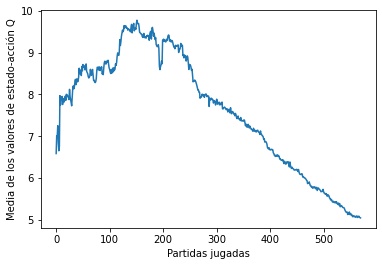

In [11]:
plt.xlabel('Partidas jugadas')
plt.ylabel('Media de los valores de estado-acción Q')
plt.plot(df['Q values'])

### Puntuación y recompensa medias

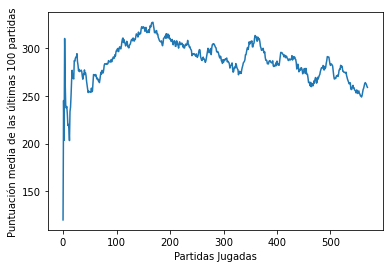

In [12]:
mean_score = 0
scores = []
running_reward = []
for i in df['score']:
    scores.append(i)
    if len(scores) > 100:
        del scores[0]
    
    mean_reward = np.mean(scores)
    running_reward.append(mean_reward)

plt.xlabel('Partidas Jugadas')
plt.ylabel('Puntuación media de las últimas 100 partidas')
plt.plot(running_reward)

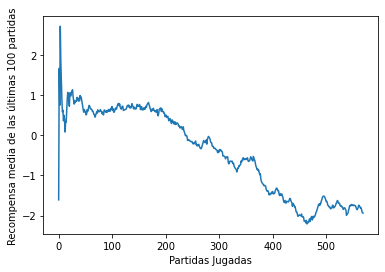

In [13]:
mean_reward = 0
rewards = []
running_reward = []
for i in df['episode reward']:
    rewards.append(i)
    if len(rewards) > 100:
        del rewards[0]
    
    mean_reward = np.mean(rewards)
    running_reward.append(mean_reward)

plt.xlabel('Partidas Jugadas')
plt.ylabel('Recompensa media de las últimas 100 partidas')
plt.plot(running_reward)

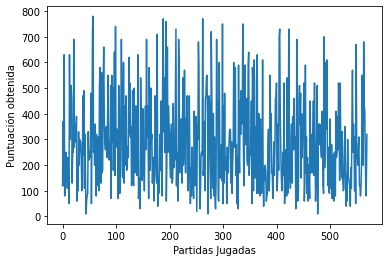

In [9]:
plt.plot(df['score'])
plt.xlabel('Partidas Jugadas')
plt.ylabel('Puntuación obtenida')

### Mean frames per episode over last 100 episodes

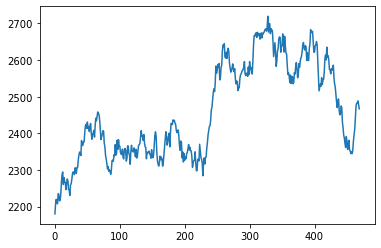

In [10]:
mean_frames = 0
frames = []
last_frames = []
for i in df['episode frames']:
    frames.append(i)
    if len(frames) > 100:
        del frames[0]
    
    mean_frames = np.mean(frames)
    last_frames.append(mean_frames)
    
plt.plot(last_frames[100:])

## Modelo utilizado

In [10]:
inputs = layers.Input((84, 84, 4,))

# 3 convolutional layers
layer1 = layers.Conv2D(32, (8, 8), strides=4, activation='relu')(inputs)
layer2 = layers.Conv2D(64, (4, 4), strides=2, activation='relu')(layer1)
layer3 = layers.Conv2D(64, (3, 3), strides=1, activation='relu')(layer2)

# Flatten the output of the convolutional layers
flatten = layers.Flatten()(layer3)

# Fully connected layer
layer5 = layers.Dense(512, activation='relu')(flatten)

# Output layer
output = layers.Dense(6, activation='linear')(layer5)

model = keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 84, 84, 4)]       0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 6)                 3078  

## Resultados obtenidos

In [14]:
human_scores = [
    [670, 690, 340, 990, 1300, 490, 550, 900, 380, 420],
    [220, 480, 360, 740, 290, 370, 410, 430, 320, 440],
    [400, 620, 490, 550, 370, 560, 920, 770, 610, 850]
]

In [40]:
ai_scores = [720, 770, 1030, 820, 550, 430, 830, 790, 960, 880]

In [41]:
human_mean = (np.mean(human_scores[0]), np.mean(human_scores[1]), np.mean(human_scores[2]))
ai_mean = np.mean(ai_scores)

human_max = (np.max(human_scores[0]), np.max(human_scores[1]), np.max(human_scores[2]))
ai_max = np.max(ai_scores)


In [42]:
print(human_mean, ai_mean)

(673.0, 406.0, 614.0) 778.0


In [48]:
print(human_max, ai_max)

(1300, 740, 920) 1030


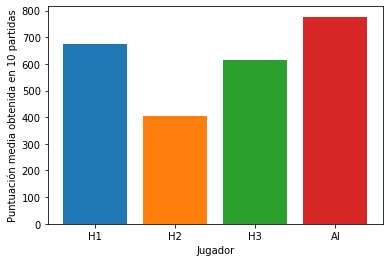

In [37]:
plt.xlabel('Jugador')
plt.ylabel('Puntuación media obtenida en 10 partidas')
plt.bar(('H1'), human_mean[0])
plt.bar(('H2'), human_mean[1])
plt.bar(('H3'), human_mean[2])
plt.bar(('AI'), ai_mean)
plt.savefig('Resources/mean_results.pdf')

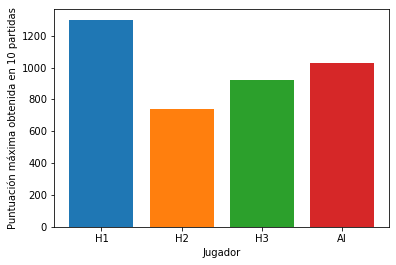

In [38]:
plt.xlabel('Jugador')
plt.ylabel('Puntuación máxima obtenida en 10 partidas')
plt.bar(('H1'), human_max[0])
plt.bar(('H2'), human_max[1])
plt.bar(('H3'), human_max[2])
plt.bar(('AI'), ai_max)
plt.savefig('Resources/max_results.pdf')

In [44]:
total_human_mean = np.mean(human_mean)
total_human_mean

564.3333333333334

In [47]:
human_level = (ai_mean / total_human_mean) * 100
human_level

137.86178381571176